# Training a univariate linear regression model

Predicting the target:Price of a house according to the feature:Size (sqft_lot)

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Define trainable variables
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)

# Define model
def linear_regression(intercept, slope, features):
    return intercept + (slope * features)

# Computre predicted values and return loss function
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

# Instantiate Adam optimizer
opt = tf.keras.optimizers.Adam()

In [3]:
count = 0
# Load data in batches
for batch in pd.read_csv("../datasets/kc_house_data.csv", chunksize=100):
    # Extract price column
    price_batch = np.array(batch.loc[:, "price"], np.float32) #; print(price)
    
    # Extract size column
    size_batch = np.array(batch.loc[:, "sqft_lot"], np.float32) #; print(size)

    # Minimizing the loss
    opt.minimize(
        lambda: loss_function(intercept, slope, price_batch, size_batch),
        var_list=[intercept, slope]
    )

    #print("Batch[" + str(count) + "]", intercept.numpy(), slope.numpy()); count += 1
    
print(intercept.numpy(), slope.numpy())

0.31781912 0.29831016


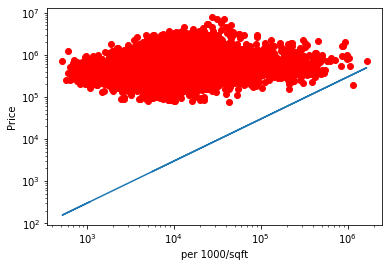

In [17]:
housing = pd.read_csv("../datasets/kc_house_data.csv", usecols=lambda col: col in ['price', 'sqft_lot'])
prices = housing.loc[:, "price"]
size = housing.loc[:, "sqft_lot"]

# plt.scatter(size, prices) # OR plt.plot(size, prices, "ro")
plt.plot(size, prices, "ro")
plt.xlabel("per 1000/sqft")
plt.xscale("log")
plt.ylabel("Price")
plt.yscale("log")
prediction = (slope * size ) + intercept #; print(y)
plt.plot(size, prediction)

# %matplotlib inline